# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("crime_reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312372 entries, 0 to 2312371
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21129
Address                             12
Zip Code                         14267
Council District                 47237
APD Sector                        9069
APD District                      9549
PRA                              10822
Census Tract                   1610964
Clearance Status                607075
Clearance Date                  337875
UCR Category                   1523024
Category Description           1523024
X-coordinate                     10235
Y-coordinate                     10235
Latitude                         39088
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2312367,20161211213,ASSAULT BY THREAT,901,N,04/30/2016 03:00:00 PM,04/30/2016,1500.0,04/30/2016 04:01:00 PM,04/30/2016,1601.0,RESIDENCE / HOME,9301 OLD BEE CAVES RD,78735.0,NaN,DA,6,45.0,NaN,N,05/04/2016,NaN,NaN,3064189.0,3064189.0,30.259883,-97.901829,"(30.25988292, -97.90182915)"
2312368,20082591604,PROBATION VIOL,3114,N,09/15/2008 05:59:00 PM,09/15/2008,1759.0,09/15/2008 05:59:00 PM,09/15/2008,1759.0,STREETS / HWY / ROAD / ALLEY,N IH 35 SVRD NB / W PARMER LN,78753.0,7.0,ED,6,206.0,NaN,C,09/28/2008,NaN,NaN,3134827.0,3134827.0,30.407862,-97.673956,"(30.40786174, -97.67395623)"
2312369,20043141761,VOCO AMPLIFIED MUSIC/VEHICLE,3218,N,11/09/2004 10:00:00 PM,11/09/2004,2200.0,11/09/2004 10:00:00 PM,11/09/2004,2200.0,STREETS / HWY / ROAD / ALLEY,N LAMAR BLVD / PAYTON GIN RD,78753.0,4.0,ED,1,237.0,NaN,C,11/29/2004,NaN,NaN,3127016.0,3127016.0,30.357646,-97.700113,"(30.35764573, -97.70011339)"
2312370,20135039080,BURGLARY OF VEHICLE,601,N,08/25/2013 11:00:00 PM,08/25/2013,2300.0,08/26/2013 05:04:00 PM,08/26/2013,1704.0,STREETS / HWY / ROAD / ALLEY,1405 BLAKENEY LN,78753.0,1.0,ED,7,223.0,NaN,N,08/27/2013,23F,Theft,3140141.0,3140141.0,30.383847,-97.657761,"(30.38384684, -97.65776054)"
2312371,2021541567,ASSAULT BY THREAT,901,N,02/23/2021 11:11:00 PM,02/23/2021,2311.0,02/23/2021 11:11:00 PM,02/23/2021,2311.0,RESIDENCE / HOME,9010 GALEWOOD DR,78758.0,4.0,ED,2,235.0,NaN,C,02/24/2021,NaN,NaN,3122208.0,3122208.0,30.367942,-97.715082,"(30.36794153, -97.71508242)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

829

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2311543 entries, 2003-01-01 to 2021-02-27
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21118
address                            12
zip_code                        14262
council_district                47219
apd_sector                       9065
apd_district                     9545
clearance_status               606841
clearance_date                 337716
latitude                        39060
longitude                       39060
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,FAMILY DISTURBANCE,N,2003-01-01 09:22:00,RESIDENCE / HOME,1214 E 7TH ST,78702.0,1.0,CH,2,N,2003-01-13,30.265408,-97.729235,2003,1,1,1
2003-01-01,FAMILY DISTURBANCE,N,2003-01-01 03:22:00,RESIDENCE / HOME,2921 E 12TH ST,78702.0,1.0,CH,2,N,2003-01-13,30.275743,-97.706147,2003,1,1,1
2003-01-01,CRIMINAL MISCHIEF,N,2003-01-01 20:55:00,STREETS / HWY / ROAD / ALLEY,600 W 6TH ST,78701.0,9.0,GE,1,N,NaT,30.269897,-97.748559,2003,1,1,1
2003-01-01,PUBLIC INTOXICATION,N,2003-01-01 04:36:00,PARKING LOTS / GARAGE,401 LITTLE TEXAS LN,78745.0,2.0,FR,4,C,2003-01-03,30.200675,-97.772540,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2013-04-04 10:09:00,RESIDENCE / HOME,3308 CATALINA DR,78741.0,3.0,HE,2,O,2013-04-05,30.219703,-97.738600,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-02-27,AGG ASSAULT,N,2021-02-27 05:07:00,PARKING LOTS / GARAGE,2121 W WILLIAM CANNON DR,78745.0,5.0,FR,1,NaN,NaT,30.203085,-97.808605,2021,2,8,27
2021-02-27,THEFT,N,2021-02-27 23:09:00,HOTEL / MOTEL / ETC.,109 E 7TH ST,78701.0,9.0,GE,2,NaN,NaT,30.268716,-97.742089,2021,2,8,27
2021-02-27,PUBLIC INTOXICATION,N,2021-02-27 01:30:00,BAR / NIGHT CLUB,413 E 6TH ST,78701.0,9.0,GE,2,C,2021-02-27,30.266692,-97.738851,2021,2,8,27
2021-02-27,DEL CONTROLLED SUB/NARCOTIC,N,2021-02-27 20:08:00,STREETS / HWY / ROAD / ALLEY,E WILLIAM CANNON DR / S IH 35 SVRD NB,78744.0,2.0,FR,8,NaN,NaT,30.190241,-97.770116,2021,2,8,27
2021-02-27,FORGERY AND PASSING,N,2021-02-27 08:56:00,RESIDENCE / HOME,7501 W US 290 HWY SVRD WB,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,2021,2,8,27


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207460
78753.0    180065
78701.0    168816
78758.0    159758
78704.0    155283
78745.0    151443
78702.0    137113
78744.0    126827
78723.0    119472
78752.0     84814
78748.0     68479
78759.0     66682
78751.0     64231
78757.0     58174
78705.0     57392
78721.0     47358
78749.0     40612
78724.0     37825
78727.0     36045
78703.0     35345
78731.0     28790
78746.0     28207
78729.0     25431
78750.0     23780
78754.0     23005
Name: zip_code, dtype: int64

78741.0    0.090307
78753.0    0.078382
78701.0    0.073485
78758.0    0.069542
78704.0    0.067594
78745.0    0.065923
78702.0    0.059685
78744.0    0.055207
78723.0    0.052006
78752.0    0.036919
78748.0    0.029809
78759.0    0.029026
78751.0    0.027960
78757.0    0.025323
78705.0    0.024983
78721.0    0.020615
78749.0    0.017678
78724.0    0.016465
78727.0    0.015690
78703.0    0.015386
78731.0    0.012532
78746.0    0.012278
78729.0    0.011070
78750.0    0.010351
78754.0    0.010014
Name: zip_code, dtype: float64

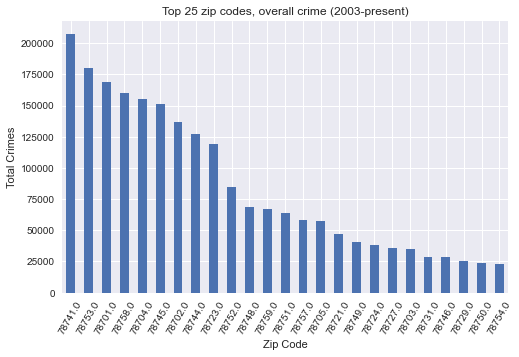

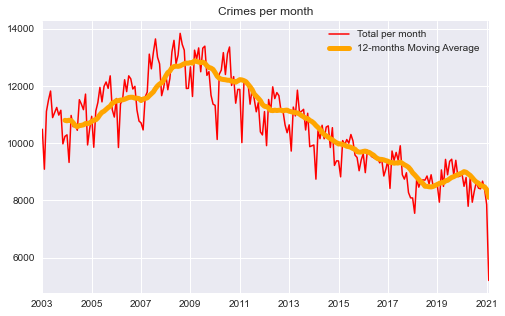

In [8]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231442
THEFT                             212174
FAMILY DISTURBANCE                180278
CRIMINAL MISCHIEF                 127890
ASSAULT W/INJURY-FAM/DATE VIOL     78323
BURGLARY OF RESIDENCE              77217
DWI                                69744
PUBLIC INTOXICATION                68818
HARASSMENT                         64459
DISTURBANCE - OTHER                61817
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,FAMILY DISTURBANCE,CRIMINAL MISCHIEF,PUBLIC INTOXICATION,ASSAULT W/INJURY-FAM/DATE VIOL,HARASSMENT,DWI,BURGLARY OF RESIDENCE,TOTAL
occurred_date,,,,,,,,,
2020-10-31,420,881,551,74,253,205,196,163,2743
2020-11-30,482,864,507,71,282,234,183,162,2785
2020-12-31,409,825,478,50,253,247,166,187,2615
2021-01-31,365,816,431,55,254,245,170,126,2462
2021-02-28,278,586,271,55,214,131,103,93,1731


<Figure size 432x288 with 0 Axes>

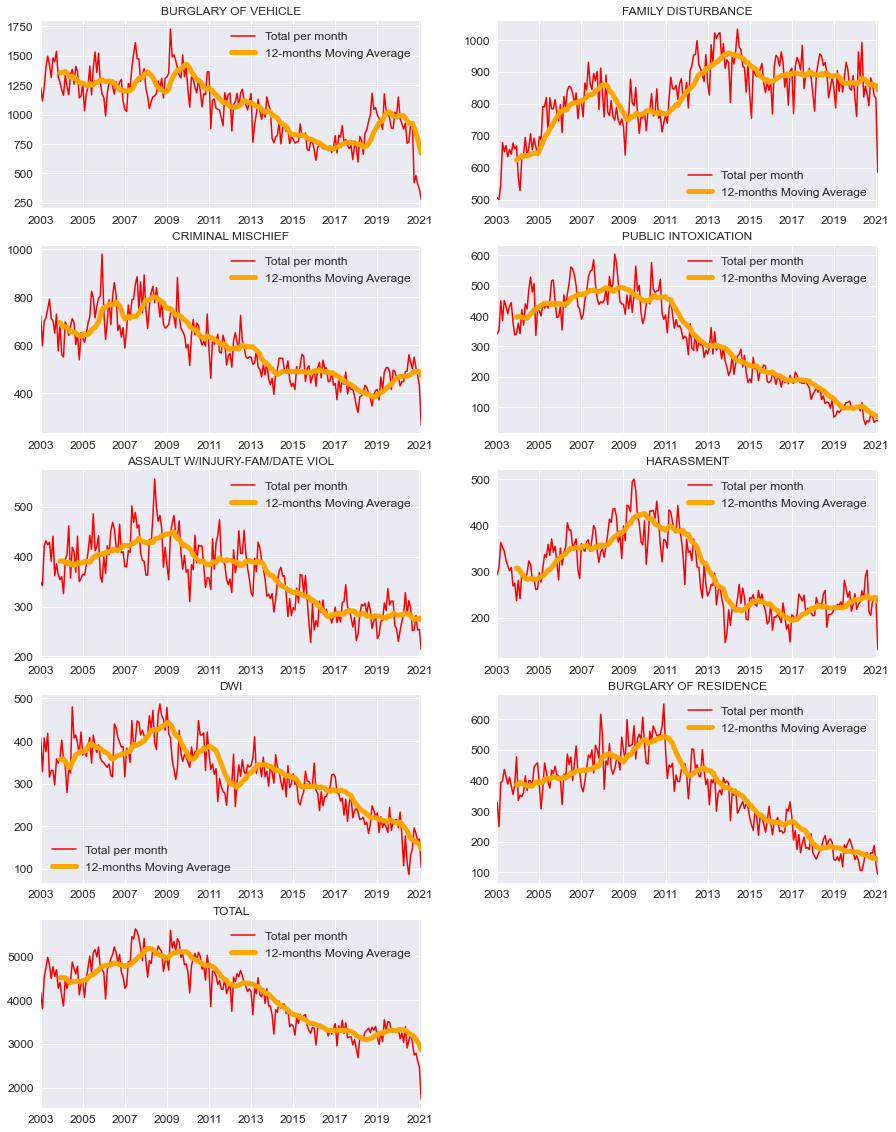

In [9]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17157
THEFT                             15797
BURGLARY OF VEHICLE                9278
WARRANT ARREST NON TRAFFIC         8965
DWI                                8327
ASSAULT WITH INJURY                7545
VIOL CITY ORDINANCE - OTHER        6185
POSS OF DRUG PARAPHERNALIA         6057
CRIMINAL MISCHIEF                  5838
CRIMINAL TRESPASS                  3929
POSSESSION OF MARIJUANA            3387
DISTURBANCE - OTHER                3364
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2904
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2596
CRIMINAL TRESPASS/TRANSIENT        2586
THEFT OF BICYCLE                   2517
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2174
DOC FIGHTING                       2113
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1732
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101631
THEFT                             0.093575
BURGLARY OF VEHICLE               0.054959
WARRANT ARREST NON TRAFFIC        0.053105
DWI                               0.049326
ASSAULT WITH INJURY               0.044694
VIOL CITY ORDINANCE - OTHER       0.036638
POSS OF DRUG PARAPHERNALIA        0.035879
CRIMINAL MISCHIEF                 0.034582
CRIMINAL TRESPASS                 0.023274
POSSESSION OF MARIJUANA           0.020063
DISTURBANCE - OTHER               0.019927
CUSTODY ARREST TRAFFIC WARR       0.017729
POSS CONTROLLED SUB/NARCOTIC      0.017202
CAMPING IN PARK                   0.016497
VOCO - ALCOHOL  CONSUMPTION       0.015935
ASSAULT BY CONTACT                0.015378
CRIMINAL TRESPASS/TRANSIENT       0.015318
THEFT OF BICYCLE                  0.014910
URINATING IN PUBLIC PLACE         0.013838
FAMILY DISTURBANCE                0.012878
DOC FIGHTING                      0.012517
PROTECTIVE ORDER                  0.012434
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

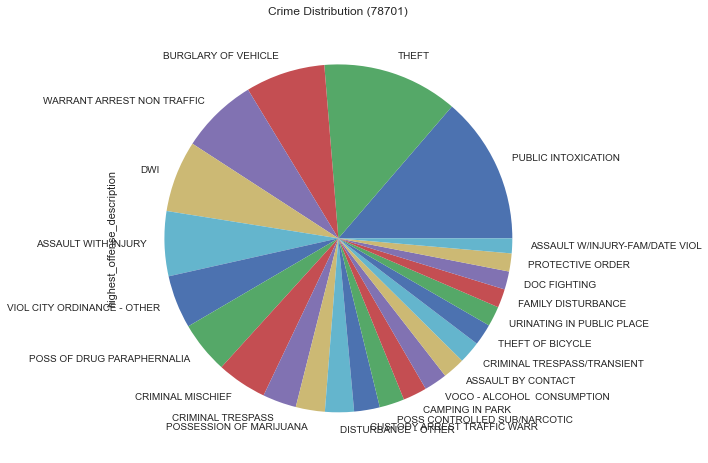

In [10]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17200
BURGLARY OF VEHICLE               15969
FAMILY DISTURBANCE                14722
CRIMINAL MISCHIEF                  9495
THEFT BY SHOPLIFTING               7645
ASSAULT W/INJURY-FAM/DATE VIOL     7191
BURGLARY OF RESIDENCE              6079
DWI                                5077
DISTURBANCE - OTHER                4789
CUSTODY ARREST TRAFFIC WARR        4385
HARASSMENT                         4268
AUTO THEFT                         4251
POSS OF DRUG PARAPHERNALIA         3744
PUBLIC INTOXICATION                3394
ASSAULT WITH INJURY                3328
CRIMINAL TRESPASS                  3154
POSS CONTROLLED SUB/NARCOTIC       2995
RUNAWAY CHILD                      2936
WARRANT ARREST NON TRAFFIC         2813
POSSESSION OF MARIJUANA            2729
BURGLARY NON RESIDENCE             2499
VIOL CITY ORDINANCE - OTHER        1880
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

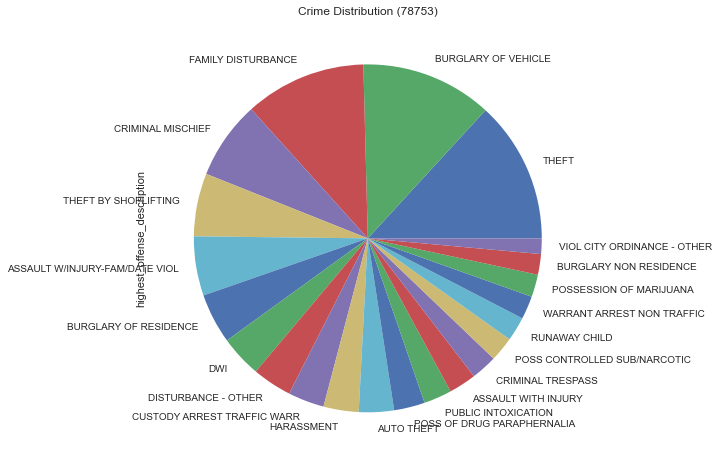

In [11]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20425
BURGLARY OF VEHICLE               19827
THEFT                             15623
CRIMINAL MISCHIEF                 11069
ASSAULT W/INJURY-FAM/DATE VIOL     9650
BURGLARY OF RESIDENCE              8891
PUBLIC INTOXICATION                6387
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5672
HARASSMENT                         5535
DISTURBANCE - OTHER                5181
AUTO THEFT                         4660
ASSAULT WITH INJURY                4544
CRIMINAL TRESPASS                  3928
POSS CONTROLLED SUB/NARCOTIC       3873
POSSESSION OF MARIJUANA            3794
THEFT BY SHOPLIFTING               3582
POSS OF DRUG PARAPHERNALIA         3545
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2796
VIOL CITY ORDINANCE - OTHER        2196
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098453
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

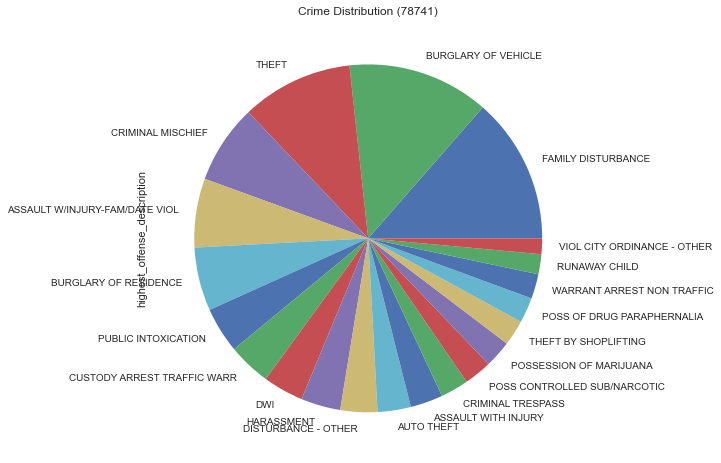

In [12]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15003
BURGLARY OF VEHICLE               14756
THEFT                             13598
CRIMINAL MISCHIEF                  8540
BURGLARY OF RESIDENCE              5874
ASSAULT W/INJURY-FAM/DATE VIOL     5772
HARASSMENT                         5158
DISTURBANCE - OTHER                4534
DWI                                4428
PUBLIC INTOXICATION                4001
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2883
AUTO THEFT                         2865
ASSAULT WITH INJURY                2677
RUNAWAY CHILD                      2606
POSSESSION OF MARIJUANA            2593
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2025
THEFT BY SHOPLIFTING               1994
CRIMINAL TRESPASS                  1961
IDENTITY THEFT                     1594
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

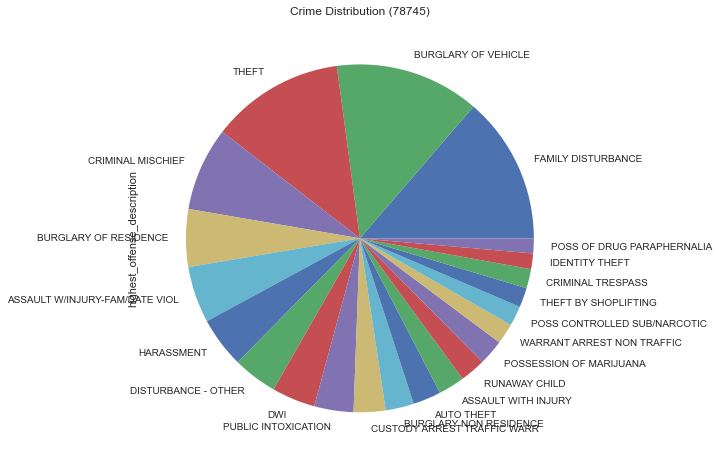

In [13]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8650
THEFT                             5625
CRIMINAL MISCHIEF                 4980
THEFT OF BICYCLE                  3496
PUBLIC INTOXICATION               2632
BURGLARY OF RESIDENCE             2125
WARRANT ARREST NON TRAFFIC        1551
CRIMINAL TRESPASS                 1353
AUTO THEFT                        1323
ASSAULT WITH INJURY               1254
HARASSMENT                        1220
DWI                               1217
FAMILY DISTURBANCE                1200
DISTURBANCE - OTHER               1120
BURGLARY NON RESIDENCE             882
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        793
CUSTODY ARREST TRAFFIC WARR        782
GRAFFITI                           780
ASSAULT W/INJURY-FAM/DATE VIOL     696
POSSESSION OF MARIJUANA            658
ASSAULT BY CONTACT                 620
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150718
THEFT                             0.098010
CRIMINAL MISCHIEF                 0.086772
THEFT OF BICYCLE                  0.060914
PUBLIC INTOXICATION               0.045860
BURGLARY OF RESIDENCE             0.037026
WARRANT ARREST NON TRAFFIC        0.027025
CRIMINAL TRESPASS                 0.023575
AUTO THEFT                        0.023052
ASSAULT WITH INJURY               0.021850
HARASSMENT                        0.021257
DWI                               0.021205
FAMILY DISTURBANCE                0.020909
DISTURBANCE - OTHER               0.019515
BURGLARY NON RESIDENCE            0.015368
CRIMINAL TRESPASS/TRANSIENT       0.015124
VIOL CITY ORDINANCE - OTHER       0.013817
CUSTODY ARREST TRAFFIC WARR       0.013626
GRAFFITI                          0.013591
ASSAULT W/INJURY-FAM/DATE VIOL    0.012127
POSSESSION OF MARIJUANA           0.011465
ASSAULT BY CONTACT                0.010803
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

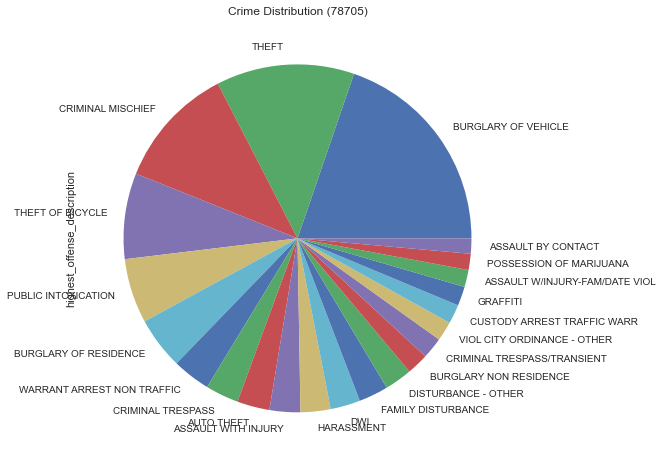

In [14]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5396
THEFT                             5090
THEFT BY SHOPLIFTING              2545
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 761
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         627
AUTO THEFT                         607
BURGLARY OF RESIDENCE              521
THEFT FROM PERSON                  462
DISTURBANCE - OTHER                433
IDENTITY THEFT                     432
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            298
FRAUD - OTHER                      280
SUSPICIOUS PERSON                  256
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191300
THEFT                             0.180452
THEFT BY SHOPLIFTING              0.090226
CRIMINAL MISCHIEF                 0.045202
DWI                               0.031233
FAMILY DISTURBANCE                0.026979
VIOL CITY ORDINANCE - OTHER       0.023115
HARASSMENT                        0.022229
AUTO THEFT                        0.021519
BURGLARY OF RESIDENCE             0.018471
THEFT FROM PERSON                 0.016379
DISTURBANCE - OTHER               0.015351
IDENTITY THEFT                    0.015315
BURGLARY NON RESIDENCE            0.012656
ASSAULT W/INJURY-FAM/DATE VIOL    0.012054
CRED CARD ABUSE - OTHER           0.011557
PUBLIC INTOXICATION               0.011380
POSSESSION OF MARIJUANA           0.010565
FRAUD - OTHER                     0.009927
SUSPICIOUS PERSON                 0.009076
CUSTODY ARREST TRAFFIC WARR       0.008757
WARRANT ARREST NON TRAFFIC        0.007906
ASSAULT WITH INJURY               0.007020
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

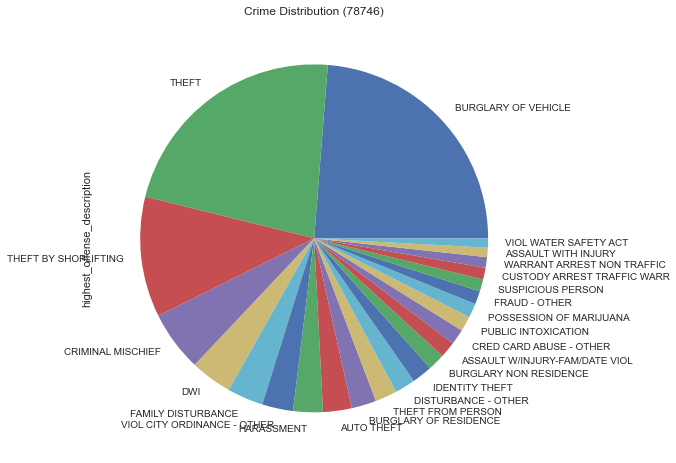

In [15]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [16]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130671
78753.0    0.099303
78758.0    0.094138
78723.0    0.074766
78701.0    0.074427
78702.0    0.074189
78745.0    0.057774
78752.0    0.052370
78744.0    0.052031
78704.0    0.048360
78721.0    0.027562
78724.0    0.024503
78705.0    0.021478
78757.0    0.020731
78748.0    0.017502
78751.0    0.017060
78759.0    0.013628
78722.0    0.009448
78754.0    0.008360
78727.0    0.007986
78749.0    0.007816
78617.0    0.007715
78729.0    0.007137
78750.0    0.005743
78731.0    0.005268
Name: zip_code, dtype: float64

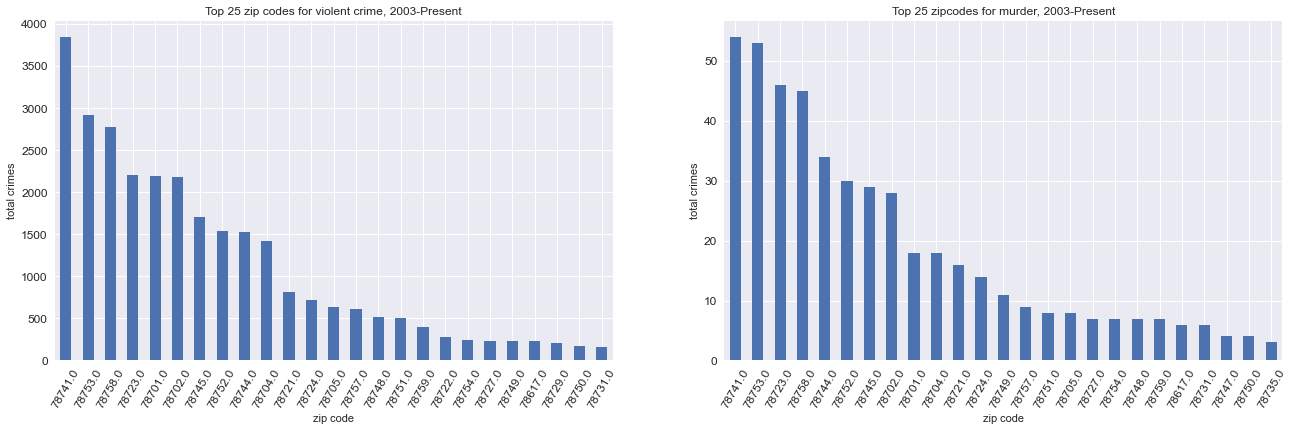

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

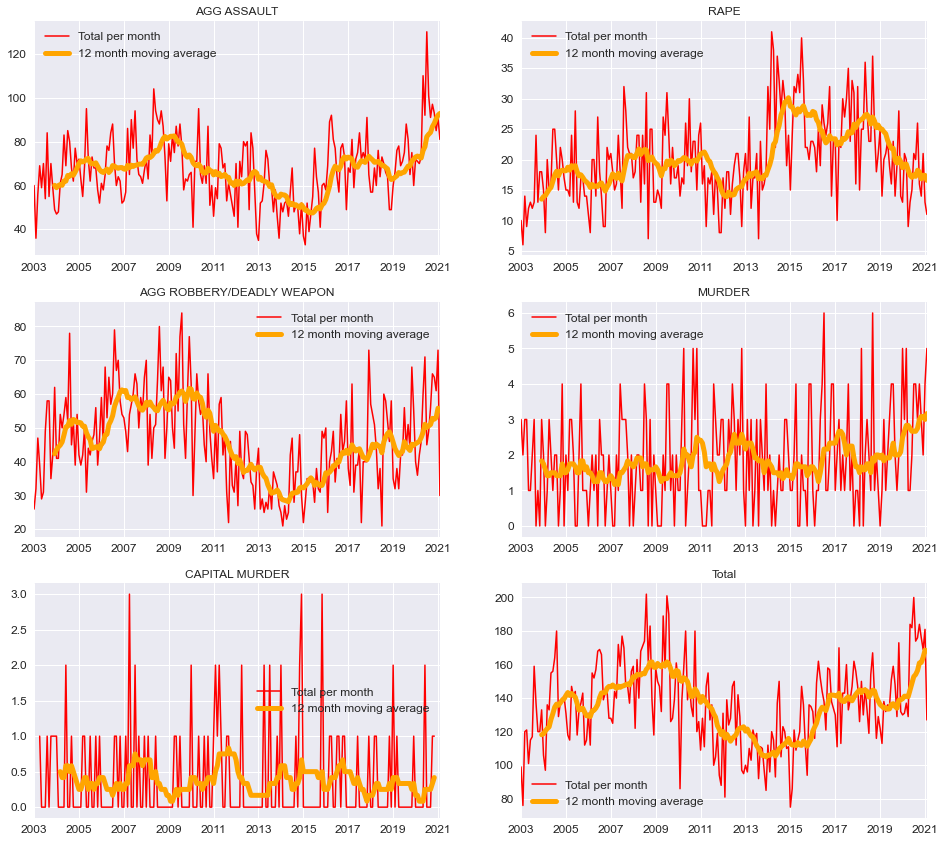

In [17]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

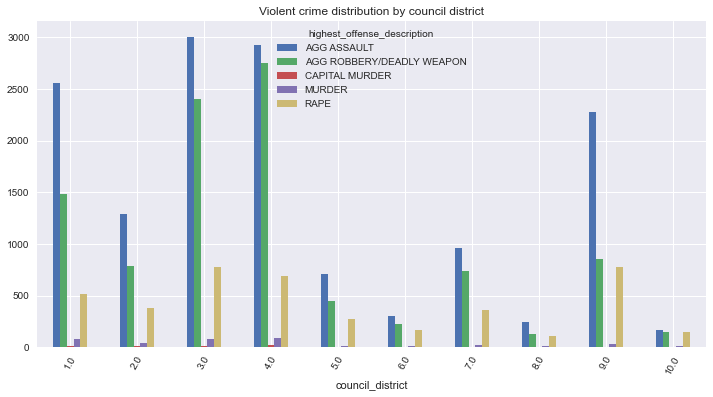

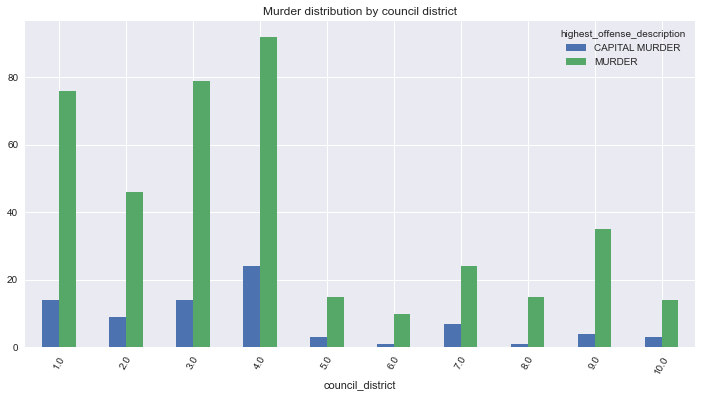

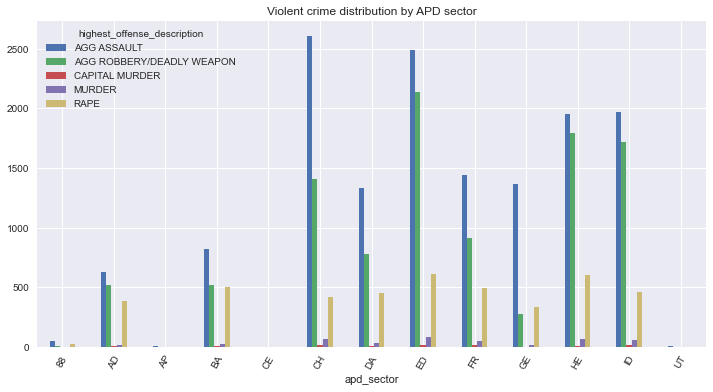

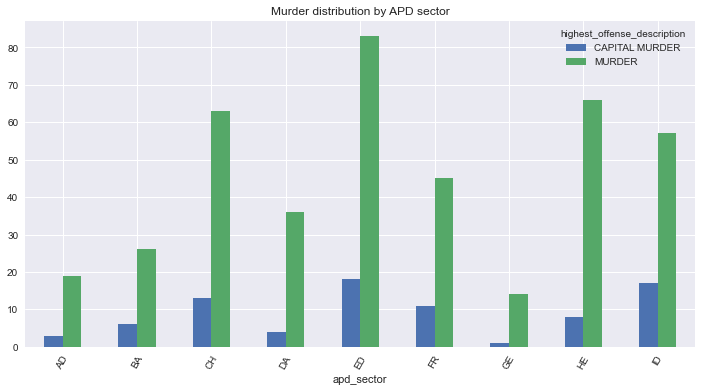

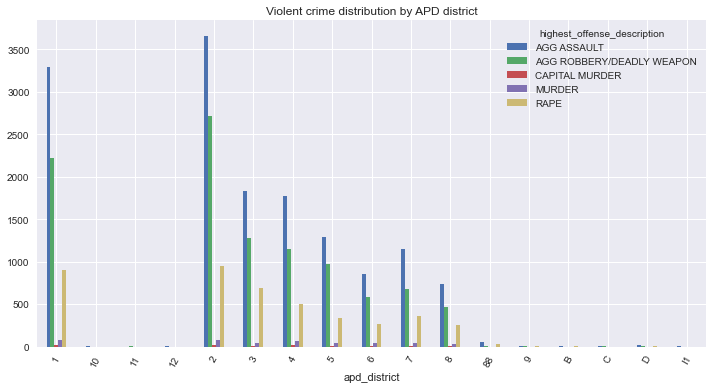

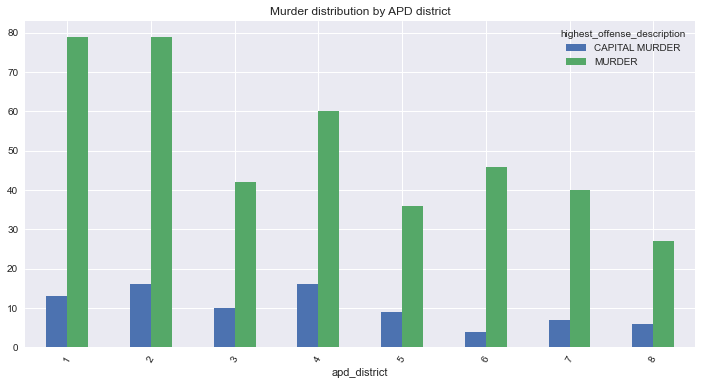

In [18]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,658,46,2,7,78
CAMP / CAMPGROUND,21,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


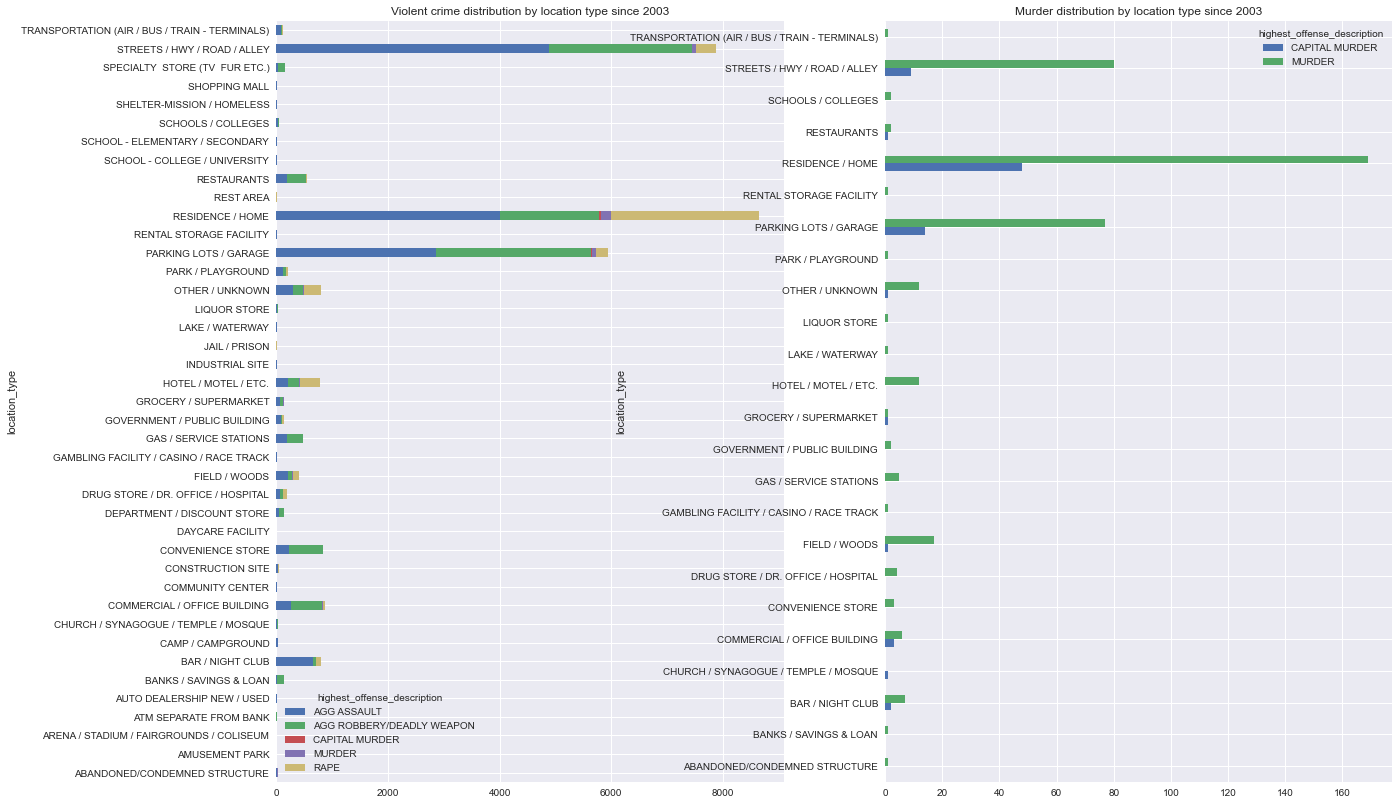

In [19]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11518
1030 NORWOOD PARK BLVD             9201
2901 S CAPITAL OF TEXAS HWY NB     8105
3600 PRESIDENTIAL BLVD             7341
500 E 7TH ST                       6105
1000 E 41ST ST                     5813
3708 S 2ND ST                      5254
2508 E RIVERSIDE DR                4818
11200 LAKELINE MALL DR             4499
9300 S IH 35 SVRD SB               4062
715 E 8TH ST                       4004
9414 N LAMAR BLVD                  3864
1137 GUNTER ST                     3199
710 E BEN WHITE BLVD SVRD WB       3193
6001 AIRPORT BLVD                  2923
12900 N IH 35 SVRD SB              2801
5800 TECHNI CENTER DR              2734
5901 AIRPORT BLVD                  2718
2701 E 7TH ST                      2709
6118 FAIRWAY ST                    2665
1300 CROSSING PL                   2628
1515 WICKERSHAM LN                 2435
6409 SPRINGDALE RD                 2435
2400 S CONGRESS AVE                2433
601 E 15TH ST                      2362


In [24]:
springdale = df.query(
    'address == "6409 SPRINGDALE RD"' & "6407 SPRINGDALE RD"'
)
display(springdale.head())
display(springdale.tail())

SyntaxError: EOL while scanning string literal (<ipython-input-24-bf38af0985f9>, line 2)

In [ ]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

In [ ]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

In [ ]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")